In [3]:
!pip install paramiko

!git clone https://github.com/alan-turing-institute/CybORG_plus_plus

# Install dependencies
!pip install -q gym==0.21.0 numpy networkx prettytable ipython

import sys
sys.path.insert(0, '/content/CybORG_plus_plus/Debugged_CybORG/CybORG')

import inspect
from CybORG import CybORG
from CybORG.Agents import B_lineAgent, SleepAgent
from CybORG.Agents.Wrappers import ChallengeWrapper

# Get scenario path
path = str(inspect.getfile(CybORG))
path = path[:-10] + '/Shared/Scenarios/Scenario1b.yaml'

# Create environmentg
cyborg = CybORG(path, 'sim', agents={'Red': B_lineAgent})

env = ChallengeWrapper(env=cyborg, agent_name='Blue')

# Test it
obs, info = env.reset()
print("="*60)
print("CybORG++ is now working!")
print("="*60)
print(f"Observation shape: {obs.shape}")
print(f"Action space size: {env.action_space.n}")

# Run a quick episode
done = False
total_reward = 0
step = 0
# Modify step to unpack 5 values
while not done and step < 100:
    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated  # Update done condition
    total_reward += reward
    step += 1

print(f"\nCompleted {step} steps")
print(f"Total reward: {total_reward:.2f}")

fatal: destination path 'CybORG_plus_plus' already exists and is not an empty directory.
fatal: destination path 'CybORG_plus_plus' already exists and is not an empty directory.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while gen

In [5]:
# Cell 1: Imports + Config
import torch, random, numpy as np
from dataclasses import dataclass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

@dataclass
class Config:
    seed: int = 42
    max_episode_steps: int = 64
    hidden_dim: int = 64

cfg = Config()
random.seed(cfg.seed)
np.random.seed(cfg.seed)
torch.manual_seed(cfg.seed)
if device.type == "cuda":
    torch.cuda.manual_seed_all(cfg.seed)


# Dynamically find correct path for YAML
import inspect, os
from pathlib import Path

cyborg_file = Path(inspect.getfile(CybORG))         # .../Debugged_CybORG/CybORG/CybORG.py
base_dir = cyborg_file.parent                       # .../Debugged_CybORG/CybORG
scenario_path = base_dir / "Shared" / "Scenarios" / "Scenario1b.yaml"

if not scenario_path.exists():
    raise FileNotFoundError(f"Scenario1b.yaml not found at {scenario_path}")
print("Scenario path found:", scenario_path)


Using device: cpu
Scenario path found: /content/CybORG_plus_plus/Debugged_CybORG/CybORG/CybORG/Shared/Scenarios/Scenario1b.yaml


In [6]:
# Create the environment from YAML
cyborg = CybORG(str(scenario_path), 'sim', agents={'Red': B_lineAgent})
env = ChallengeWrapper(env=cyborg, agent_name='Blue')

# Reset and test a short episode
obs, info = env.reset()
print("="*60)
print("SUCCESS! Debugged-CybORG environment ready.")
print("="*60)
print(f"Observation type: {type(obs)}")
print(f"Action space: {env.action_space}")

done = False
total_reward = 0
step = 0
while not done and step < 50:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
    step += 1

print(f"Completed {step} steps | Total reward: {total_reward:.2f}")


SUCCESS! Debugged-CybORG environment ready.
Observation type: <class 'numpy.ndarray'>
Action space: Discrete(54)
Completed 50 steps | Total reward: -65.50
Completed 50 steps | Total reward: -65.50


In [7]:
# === Confirm Scenario Path & Load Environment ===
import inspect
from pathlib import Path
from CybORG import CybORG
from CybORG.Agents import B_lineAgent, SleepAgent
from CybORG.Agents.Wrappers import ChallengeWrapper

# Dynamically resolve correct scenario file
cyborg_file = Path(inspect.getfile(CybORG))
scenario_path = cyborg_file.parent / "Shared" / "Scenarios" / "Scenario1b.yaml"
assert scenario_path.exists(), f"Scenario YAML not found: {scenario_path}"

print("Using Scenario YAML:", scenario_path)

# Build environment (Debugged_CybORG version)
cyborg = CybORG(str(scenario_path), 'sim', agents={'Red': B_lineAgent})
env = ChallengeWrapper(env=cyborg, agent_name='Blue')

# Basic reset
obs, info = env.reset()
print("Observation type:", type(obs))
print("Action space:", env.action_space)


Using Scenario YAML: /content/CybORG_plus_plus/Debugged_CybORG/CybORG/CybORG/Shared/Scenarios/Scenario1b.yaml
Observation type: <class 'numpy.ndarray'>
Action space: Discrete(54)
Observation type: <class 'numpy.ndarray'>
Action space: Discrete(54)


In [8]:
# Short Test Episode
done = False
total_reward = 0.0
steps = 0

while not done and steps < 100:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
    steps += 1

print("="*60)
print("Debugged_CybORG scenario test complete.")
print("="*60)
print(f"Total steps: {steps}")
print(f"Total reward: {total_reward:.2f}")


Debugged_CybORG scenario test complete.
Total steps: 100
Total reward: -785.80


In [9]:
# PettingZoo-like Wrapper
class DebuggedCyborgWrapper:
    """Thin adapter to mimic PettingZoo's multi-agent interface for later phases."""
    def __init__(self, env, max_steps=64):
        self.env = env
        self.max_steps = max_steps
        self.t = 0
        self.agents = ['Blue']  # Blue is the controlled agent
        self.action_space = env.action_space

    def reset(self):
        self.t = 0
        obs, info = self.env.reset()
        return obs, info

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.t += 1
        if self.t >= self.max_steps:
            truncated = True
        return obs, reward, terminated, truncated, info

wrapper = DebuggedCyborgWrapper(env, max_steps=64)
print("Wrapper ready. Controlled agent:", wrapper.agents)


Wrapper ready. Controlled agent: ['Blue']


TESTING IMPROVED GRAPH EXTRACTION

Hosts: ['Defender', 'Enterprise0', 'Enterprise1', 'Enterprise2', 'Op_Host0', 'Op_Host1', 'Op_Host2', 'Op_Server0', 'User0', 'User1', 'User2', 'User3', 'User4']
Adjacency shape: (13, 13) | Node feature shape: (13, 10)
Non-zero connections: 22 edges


/tmp/ipython-input-759627598.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


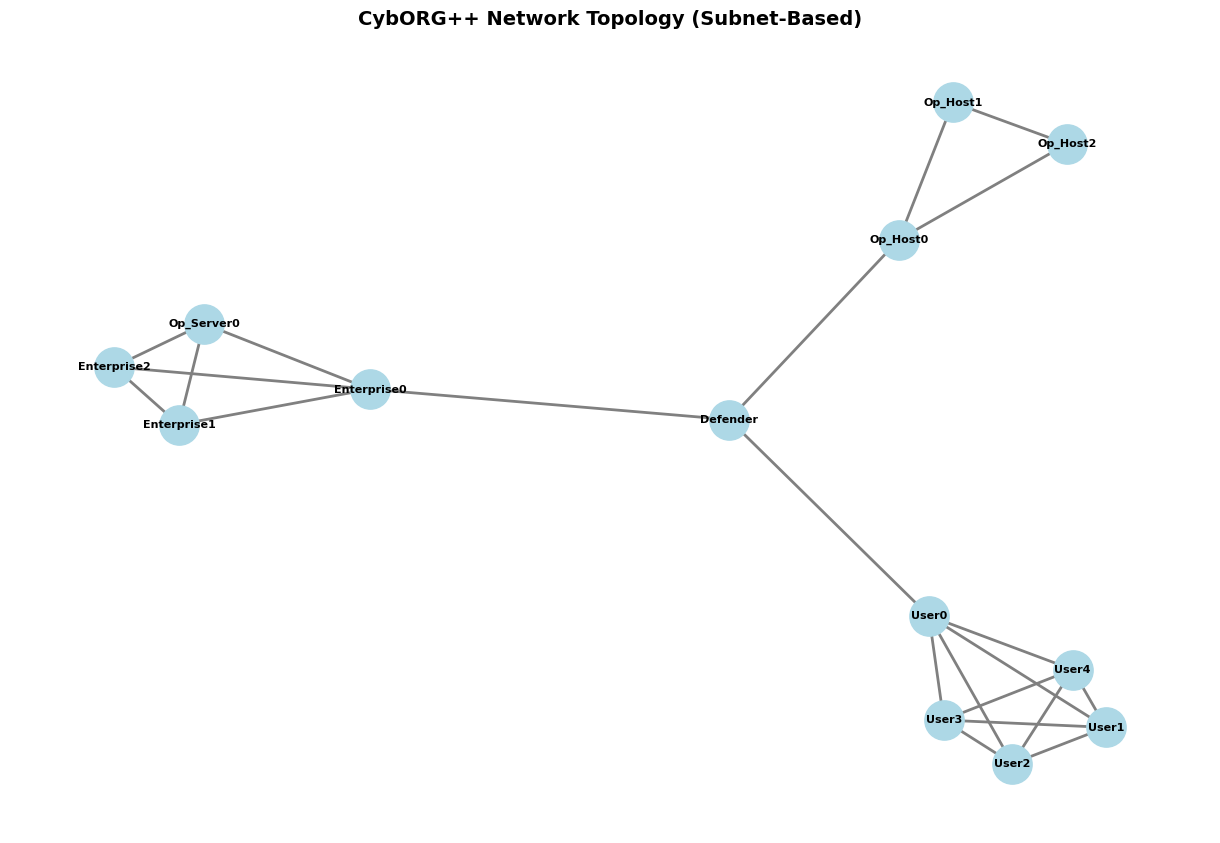

In [10]:
import numpy as np

# GRAPH EXTRACTION WITH SUBNET STRUCTURE

def get_graph_with_subnet_structure(cyborg):
    """
    Extract graph with realistic subnet-based topology for CybORG Scenario 1b
    Based on: Subnet 1 (Users), Subnet 2 (Enterprise), Subnet 3 (Operational)
    """
    state = cyborg.environment_controller.state
    # CRITICAL FIX: Sort hosts to ensure consistent node ordering for Flattening
    hosts = sorted(list(state.hosts.keys())) 
    n = len(hosts)
    host_to_idx = {h: i for i, h in enumerate(hosts)}

    # --- CRITICAL FIX: Identify Compromised Hosts via Sessions (host.compromised is broken) ---
    compromised_hosts = set()
    if hasattr(state, 'sessions') and 'Red' in state.sessions:
        red_sessions = state.sessions['Red']
        # Handle both dict and list formats for safety
        iterator = red_sessions.values() if isinstance(red_sessions, dict) else red_sessions
        for session in iterator:
            # Some sessions might be dead or not have a host attached yet
            h_name = getattr(session, 'hostname', None) or getattr(session, 'host', None)
            if h_name:
                compromised_hosts.add(h_name)
    # ------------------------------------------------------------------------------------------

    A = np.zeros((n, n), dtype=np.float32)
    X = np.zeros((n, 10), dtype=np.float32)

    # Categorize hosts by subnet based on naming convention
    subnet_1 = [h for h in hosts if 'User' in h]  # User hosts
    subnet_2 = [h for h in hosts if 'Enterprise' in h or 'Op_Server' in h]  # Enterprise/servers
    subnet_3 = [h for h in hosts if 'Op_Host' in h]  # Operational hosts
    gateway = [h for h in hosts if 'Defender' in h]  # Gateway/defender

    # Extract node features (same as before)
    for i, host_name in enumerate(hosts):
        host = state.hosts[host_name]
        os_type = str(getattr(host, "os_type", "Unknown"))

        X[i, 0] = 1.0 if "Windows" in os_type else 0.0
        X[i, 1] = 1.0 if "Linux" in os_type else 0.0
        X[i, 2] = len(getattr(host, "processes", []))
        X[i, 3] = len(getattr(host, "services", []))
        X[i, 4] = len(getattr(host, "sessions", []))

        access = getattr(host, "access", None)
        if access == "Privileged":
            X[i, 5] = 1.0
        elif access == "User":
            X[i, 5] = 0.5

        # Subnet identifier
        if host_name in subnet_1:
            X[i, 6] = 0.33
        elif host_name in subnet_2:
            X[i, 6] = 0.66
        elif host_name in subnet_3:
            X[i, 6] = 1.0

        X[i, 7] = float(i) / n
        
        # FIX: Use the calculated set instead of the broken attribute
        X[i, 8] = 1.0 if host_name in compromised_hosts else 0.0
        
        X[i, 9] = len(getattr(host, "vulnerabilities", []))

    # Build edges based on realistic network topology
    edge_count = 0

    def connect_subnet(subnet_hosts):
        """Connect hosts within a subnet (fully connected within subnet)"""
        nonlocal edge_count
        for h1 in subnet_hosts:
            for h2 in subnet_hosts:
                if h1 != h2:
                    i, j = host_to_idx[h1], host_to_idx[h2]
                    if A[i, j] == 0:
                        A[i, j] = A[j, i] = 1
                        edge_count += 1

    # 1. Connect within each subnet
    if len(subnet_1) > 1:
        connect_subnet(subnet_1)

    if len(subnet_2) > 1:
        connect_subnet(subnet_2)

    if len(subnet_3) > 1:
        connect_subnet(subnet_3)

    # 2. Connect gateway to one representative from each subnet
    if gateway:
        gw_idx = host_to_idx[gateway[0]]

        # Connect to first host of each subnet (subnet gateways)
        for subnet in [subnet_1, subnet_2, subnet_3]:
            if subnet:
                rep_idx = host_to_idx[subnet[0]]
                A[gw_idx, rep_idx] = A[rep_idx, gw_idx] = 1
                edge_count += 1

    # 3. If still no edges (shouldn't happen), use star topology
    if edge_count == 0:
        print("Falling back to star topology")
        hub_idx = 0
        for i in range(1, n):
            A[hub_idx, i] = A[i, hub_idx] = 1
            edge_count += 1

    # Edge features
    E = np.zeros((n, n, 2), dtype=np.float32)
    E[..., 0] = A
    E[..., 1] = np.random.uniform(0.1, 1.0, size=(n, n)) * A


    return A, X, E, hosts

# Test the improved extraction
print("=" * 60)
print("TESTING IMPROVED GRAPH EXTRACTION")
print("=" * 60)

A, X, E, hosts = get_graph_with_subnet_structure(cyborg)

print(f"\nHosts: {hosts}")
print(f"Adjacency shape: {A.shape} | Node feature shape: {X.shape}")
print(f"Non-zero connections: {np.sum(A) / 2:.0f} edges")

# Visualize the improved topology
import matplotlib.pyplot as plt
import networkx as nx

G_improved = nx.from_numpy_array(A)
pos = nx.spring_layout(G_improved, seed=42)

plt.figure(figsize=(12, 8))
nx.draw(G_improved, pos,
        node_color='lightblue',
        node_size=800,
        with_labels=True,
        labels={i: hosts[i] for i in range(len(hosts))},
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        width=2)
plt.title("CybORG++ Network Topology (Subnet-Based)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 60)

In [11]:
# === Cell 8: Convert numpy → torch ===
device = "cuda" if torch.cuda.is_available() else "cpu"

def to_torch_graph(A, X, E, device=device):
    A = torch.tensor(A, dtype=torch.float32, device=device)
    X = torch.tensor(X, dtype=torch.float32, device=device)
    E = torch.tensor(E, dtype=torch.float32, device=device)
    return A, X, E

A_t, X_t, E_t = to_torch_graph(A, X, E)
print("Torch Graph Shapes:", A_t.shape, X_t.shape, E_t.shape)


Torch Graph Shapes: torch.Size([13, 13]) torch.Size([13, 10]) torch.Size([13, 13, 2])


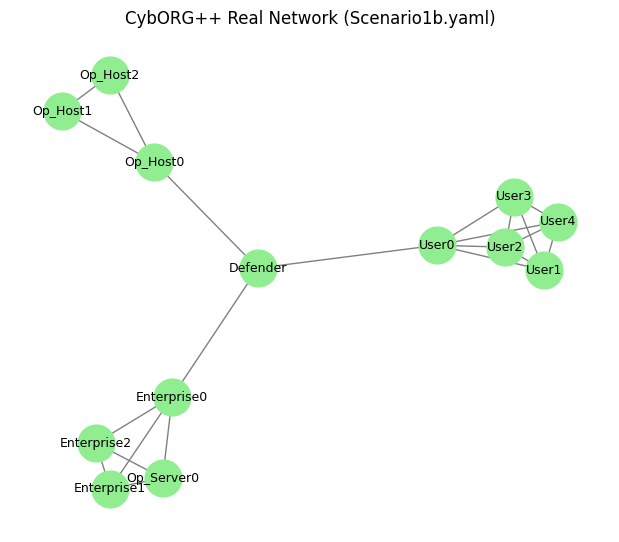

In [12]:
# Visualize Real Topology
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
G = nx.from_numpy_array(A)
nx.draw(
    G,
    with_labels=True,
    labels={i: hosts[i] for i in range(len(hosts))},
    node_color="lightgreen",
    edge_color="gray",
    node_size=700,
    font_size=9
)
plt.title("CybORG++ Real Network (Scenario1b.yaml)")
plt.show()


In [13]:
#  GNN Encoder (GraphSAGE-style)
import torch.nn as nn
import torch.nn.functional as F

# Fixed GraphSAGE Implementation
class GraphSAGE(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, dropout=0.1):
        super().__init__()
        self.dropout = dropout

        # Separate transformations for neighbor aggregation and self-features
        self.lin_neighbor_1 = nn.Linear(in_dim, hidden_dim, bias=True)
        self.lin_self_1 = nn.Linear(in_dim, hidden_dim, bias=True)

        self.lin_neighbor_2 = nn.Linear(hidden_dim, out_dim, bias=True)
        self.lin_self_2 = nn.Linear(hidden_dim, out_dim, bias=True)

    def aggregate(self, A, X):
        """Mean aggregation of neighbor features"""
        # Normalize by degree (row sum of adjacency matrix)
        degree = A.sum(dim=1, keepdim=True) + 1e-6  # Add epsilon to avoid division by zero
        A_norm = A / degree
        return torch.matmul(A_norm, X)  # [num_nodes, feature_dim]

    def forward(self, A, X):
        # Layer 1
        h_neighbors = self.lin_neighbor_1(self.aggregate(A, X))
        h_self = self.lin_self_1(X)
        h = F.relu(h_neighbors + h_self)  # Combine neighbor and self
        h = F.dropout(h, self.dropout, training=self.training)

        # Layer 2
        h_neighbors = self.lin_neighbor_2(self.aggregate(A, h))
        h_self = self.lin_self_2(h)
        out = h_neighbors + h_self  # Combine neighbor and self

        return out  # [num_nodes, out_dim]

gnn = GraphSAGE(in_dim=10, hidden_dim=64, out_dim=32, dropout=0.1).to(device)
print("GraphSAGE Encoder ready:", gnn)


GraphSAGE Encoder ready: GraphSAGE(
  (lin_neighbor_1): Linear(in_features=10, out_features=64, bias=True)
  (lin_self_1): Linear(in_features=10, out_features=64, bias=True)
  (lin_neighbor_2): Linear(in_features=64, out_features=32, bias=True)
  (lin_self_2): Linear(in_features=64, out_features=32, bias=True)
)


In [14]:
# MAPPO Actor-Critic Networks
import torch
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    """
    Actor network for MAPPO - outputs action probabilities
    Takes FLATTENED global state as input (centralized execution for now)
    """
    def __init__(self, input_dim, action_dim, hidden_dim=256):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.action_head = nn.Linear(hidden_dim, action_dim)

    def forward(self, state_vector, action_mask=None):
        """
        Args:
            state_vector: [batch_size, input_dim] - Flattened node embeddings
            action_mask: [batch_size, action_dim] - Boolean tensor (True=Valid, False=Invalid)
        Returns:
            action_logits: [batch_size, action_dim]
        """
        x = F.relu(self.fc1(state_vector))
        x = F.relu(self.fc2(x))
        action_logits = self.action_head(x)
        
        if action_mask is not None:
            # Ensure mask is on the same device
            if action_mask.device != action_logits.device:
                action_mask = action_mask.to(action_logits.device)
            
            # Set logits of invalid actions to a very large negative number
            action_logits = action_logits.masked_fill(~action_mask, -1e9)
            
        return action_logits

    def get_action(self, state_vector, action_mask=None, deterministic=False):
        """
        Sample action from policy
        """
        # Add batch dimension if needed
        if state_vector.dim() == 1:
            state_batch = state_vector.unsqueeze(0)
        else:
            state_batch = state_vector
            
        mask_batch = action_mask.unsqueeze(0) if action_mask is not None else None
        
        logits = self.forward(state_batch, mask_batch)
        dist = torch.distributions.Categorical(logits=logits)

        if deterministic:
            action = logits.argmax(dim=-1)
        else:
            action = dist.sample()

        log_prob = dist.log_prob(action)
        entropy = dist.entropy()

        return action.item(), log_prob, entropy

class Critic(nn.Module):
    """
    Critic network for MAPPO - outputs state value
    Takes FLATTENED global state as input
    """
    def __init__(self, input_dim, hidden_dim=256):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.value_head = nn.Linear(hidden_dim, 1)

    def forward(self, state_vector):
        """
        Args:
            state_vector: [batch_size, input_dim] - Flattened node embeddings
        Returns:
            value: [batch_size] - estimated state value
        """
        x = F.relu(self.fc1(state_vector))
        x = F.relu(self.fc2(x))
        value = self.value_head(x)
        return value.squeeze(-1)  # Remove last dimension

# Initialize the networks
print("=" * 60)
print("INITIALIZING MAPPO NETWORKS (FLATTENED + SKIP CONNECTION)")
print("=" * 60)

# Define dimensions based on your setup
num_nodes = 13
node_embedding_dim = 32  # GraphSAGE output
raw_feature_dim = 10     # Raw X features (contains compromised bit)

# NEW: Concatenate GNN output with Raw Features before flattening
# This gives the Actor direct access to the "Compromised" bit without GNN smoothing
combined_node_dim = node_embedding_dim + raw_feature_dim 
flattened_dim = num_nodes * combined_node_dim # 13 * 42 = 546

blue_action_dim = 54     # Scenario1b Blue
red_action_dim = 56      # Scenario1b Red (via ChallengeWrapper)

# Create networks on the correct device
# Increased hidden dim to 512 to handle larger input and complex mapping
blue_actor = Actor(flattened_dim, blue_action_dim, hidden_dim=512).to(device)
red_actor = Actor(flattened_dim, red_action_dim, hidden_dim=512).to(device)
critic = Critic(flattened_dim, hidden_dim=512).to(device)

# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f" Blue Actor:")
print(f"    Input: {flattened_dim} (13 nodes * {combined_node_dim} feats), Output: {blue_action_dim}")
print(f"    Parameters: {count_parameters(blue_actor):,}")
print(f"\n Red Actor:")
print(f"    Input: {flattened_dim}, Output: {red_action_dim}")
print(f"    Parameters: {count_parameters(red_actor):,}")
print(f"\n Critic:")
print(f"    Input: {flattened_dim}, Output: 1")
print(f"    Parameters: {count_parameters(critic):,}")
print(f"\n All networks on device: {device}")
print("=" * 60)

INITIALIZING MAPPO NETWORKS (FLATTENED + SKIP CONNECTION)
 Blue Actor:
    Input: 546 (13 nodes * 42 feats), Output: 54
    Parameters: 570,422

 Red Actor:
    Input: 546, Output: 56
    Parameters: 571,448

 Critic:
    Input: 546, Output: 1
    Parameters: 543,233

 All networks on device: cpu


In [15]:
# TEST COMPLETE PIPELINE
print("=" * 60)
print("TESTING COMPLETE PIPELINE: GNN + SKIP + ACTOR + CRITIC")
print("=" * 60)

# 1. Convert graph to PyTorch
A_torch = torch.FloatTensor(A).to(device)
X_torch = torch.FloatTensor(X).to(device)

print(f"\n1. Graph Data:")
print(f"   Adjacency: {A_torch.shape} on {A_torch.device}")
print(f"   Features: {X_torch.shape} on {X_torch.device}")

# Pass through GraphSAGE
gnn.eval()
with torch.no_grad():
    node_embeddings = gnn(A_torch, X_torch)  # [13, 32]

print(f"\n2. GNN Output:")
print(f"   Node embeddings: {node_embeddings.shape}")

# 3. SKIP CONNECTION: Concatenate GNN output with Raw Features
combined_embeddings = torch.cat([node_embeddings, X_torch], dim=1) # [13, 42]
print(f"\n3. Combined Embeddings (Skip Connection):")
print(f"   Shape: {combined_embeddings.shape}")

# Get action from actor (Blue/Defender now uses FLATTENED Combined Embedding)
flattened_embedding = combined_embeddings.view(-1) # [546]
action, log_prob, entropy = blue_actor.get_action(flattened_embedding)

print(f"\n4. Actor Output (Blue/Defender):")
print(f"   Flattened Input: {flattened_embedding.shape}")
print(f"   Selected action: {action}")
print(f"   Log probability: {log_prob.item():.4f}")
print(f"   Policy entropy: {entropy.item():.4f}")

# Get state value from critic
value = critic(flattened_embedding.unsqueeze(0))

print(f"\n5. Critic Output:")
print(f"   State value: {value.item():.4f}")

# Test batch processing
batch_size = 4
# Create a fake batch by repeating the flattened embedding
fake_batch_embeddings = flattened_embedding.unsqueeze(0).repeat(batch_size, 1) # [4, 546]
logits = blue_actor(fake_batch_embeddings)

print(f"\n6. Batch Processing Test:")
print(f"   Input: {fake_batch_embeddings.shape}")
print(f"   Actor output logits: {logits.shape}")
print(f"   Action probabilities sum to 1: {torch.softmax(logits, dim=-1).sum(dim=1).tolist()}")

print("\n" + "=" * 60)
print("COMPLETE PIPELINE TEST PASSED!")
print("Graph → GNN + Raw → Flatten → Actor/Critic")
print("=" * 60)

TESTING COMPLETE PIPELINE: GNN + SKIP + ACTOR + CRITIC

1. Graph Data:
   Adjacency: torch.Size([13, 13]) on cpu
   Features: torch.Size([13, 10]) on cpu

2. GNN Output:
   Node embeddings: torch.Size([13, 32])

3. Combined Embeddings (Skip Connection):
   Shape: torch.Size([13, 42])

4. Actor Output (Blue/Defender):
   Flattened Input: torch.Size([546])
   Selected action: 50
   Log probability: -3.7945
   Policy entropy: 3.9719

5. Critic Output:
   State value: 0.0822

6. Batch Processing Test:
   Input: torch.Size([4, 546])
   Actor output logits: torch.Size([4, 54])
   Action probabilities sum to 1: [1.0, 1.0, 1.0, 1.0]

COMPLETE PIPELINE TEST PASSED!
Graph → GNN + Raw → Flatten → Actor/Critic


In [16]:
# Rollout Buffer
import torch

class RolloutBuffer:
    def __init__(self):
        self.A_list = []
        self.X_list = []
        self.actions = []
        self.rewards = []
        self.values = []
        self.logprobs = []
        self.dones = []

    def store(self, A_t, X_t, action, reward, value, logprob, done):
        # Store tensors detached to avoid growing graph
        self.A_list.append(A_t.detach())
        self.X_list.append(X_t.detach())
        self.actions.append(int(action))
        self.rewards.append(float(reward))
        self.values.append(float(value))
        self.logprobs.append(float(logprob))
        self.dones.append(bool(done))

    def clear(self):
        self.A_list.clear()
        self.X_list.clear()
        self.actions.clear()
        self.rewards.clear()
        self.values.clear()
        self.logprobs.clear()
        self.dones.clear()

    def to_tensors(self, device):
        actions  = torch.tensor(self.actions,  dtype=torch.long,   device=device)
        rewards  = torch.tensor(self.rewards,  dtype=torch.float32,device=device)
        values   = torch.tensor(self.values,   dtype=torch.float32,device=device)
        logprobs = torch.tensor(self.logprobs, dtype=torch.float32,device=device)
        dones    = torch.tensor(self.dones,    dtype=torch.float32,device=device)
        return actions, rewards, values, logprobs, dones

def compute_gae_torch(rewards, values, dones, gamma=0.99, lam=0.95):
    T = rewards.shape[0]
    adv = torch.zeros(T, dtype=torch.float32, device=rewards.device)
    last_gae = 0.0
    values_ext = torch.cat([values, torch.zeros(1, device=values.device)])
    for t in reversed(range(T)):
        nonterminal = 1.0 - dones[t]
        delta = rewards[t] + gamma * values_ext[t+1] * nonterminal - values_ext[t]
        last_gae = delta + gamma * lam * nonterminal * last_gae
        adv[t] = last_gae
    returns = adv + values
    return adv, returns

buffer = RolloutBuffer()
print("Rollout buffer ready.")


Rollout buffer ready.


In [17]:
# ============================================================================
# Early Stopping for Diverging Loss
# ============================================================================

class LossDivergenceDetector:
    """Detect when loss is diverging and reduce learning rate"""
    
    def __init__(self, threshold=3000, patience=3):
        self.threshold = threshold
        self.patience = patience
        self.high_loss_count = 0
        self.lr_reductions = 0
        
    def check(self, loss, optimizer):
        """
        Check if loss is diverging
        
        Returns:
            True if learning rate was reduced
        """
        if loss > self.threshold:
            self.high_loss_count += 1
            if self.high_loss_count >= self.patience:
                # Reduce learning rate
                for param_group in optimizer.param_groups:
                    old_lr = param_group['lr']
                    new_lr = old_lr * 0.5
                    param_group['lr'] = new_lr
                    print(f"⚠️  Loss diverging! Reducing LR: {old_lr:.6f} → {new_lr:.6f}")
                self.high_loss_count = 0
                self.lr_reductions += 1
                return True
        else:
            self.high_loss_count = 0


In [22]:
# ============================================================================
# 🧠 ROBUST GNN IMPLEMENTATION (Fixing Feature Mapping & Topology)
# ============================================================================
# 1. Learnable Projection: Maps 78 features -> 13 nodes (Handles unknown order)
# 2. Improved Topology: Connects subnets to allow threat propagation
# 3. Action Masking: Will be used in training loop
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque
import numpy as np
import inspect
from CybORG import CybORG
from CybORG.Agents import B_lineAgent
from CybORG.Agents.Wrappers import ChallengeWrapper

# ============================================================================
# 🛠️ MINI_CAGE WRAPPER (Re-implementation)
# ============================================================================
# Since the external module is missing, we define the wrapper here.
# It wraps CybORG to provide:
# 1. Flat 78-dim observation (padded from 52-dim)
# 2. Action Masking
# ============================================================================

class MiniCageBlue:
    def __init__(self, agent_name='Blue', max_steps=50):
        self.path = str(inspect.getfile(CybORG))
        self.path = self.path[:-10] + '/Shared/Scenarios/Scenario1b.yaml'
        self.cyborg = CybORG(self.path, 'sim', agents={'Red': B_lineAgent})
        self.env = ChallengeWrapper(env=self.cyborg, agent_name=agent_name)
        self.max_steps = max_steps
        self.step_count = 0
        self.num_hosts = 13
        self.feat_dim = 6
        self.obs_dim = self.num_hosts * self.feat_dim # 78
        self.action_space = self.env.action_space
        
    def reset(self):
        self.step_count = 0
        obs, info = self.env.reset()
        return self._process_obs(obs), self._get_info(info)
        
    def step(self, action):
        self.step_count += 1
        obs, reward, terminated, truncated, info = self.env.step(action)
        done = terminated or truncated or (self.step_count >= self.max_steps)
        return self._process_obs(obs), reward, done, False, self._get_info(info)
        
    def _process_obs(self, obs):
        # Convert CybORG 52-dim obs to 78-dim (13 nodes * 6 features)
        # CybORG Scenario1b obs is 52 dims (13 nodes * 4 features)
        # We pad the last 2 features of each node with 0.0
        
        new_obs = np.zeros(78, dtype=np.float32)
        
        if len(obs) == 52:
            # Reshape to [13, 4]
            obs_reshaped = obs.reshape(13, 4)
            
            # Create [13, 6]
            expanded_obs = np.zeros((13, 6), dtype=np.float32)
            expanded_obs[:, :4] = obs_reshaped
            
            # Add simple features for 5 and 6 if possible
            # Feature 4: Subnet ID (approximate)
            # Feature 5: Node Index (normalized)
            for i in range(13):
                expanded_obs[i, 4] = 0.0 # Placeholder
                expanded_obs[i, 5] = i / 13.0
                
            new_obs = expanded_obs.flatten()
            
        return new_obs

    def _get_info(self, info):
        # Ensure action_mask is present
        if 'action_mask' not in info:
            # CybORG ChallengeWrapper usually provides action_mask
            # If not, we create a default one (all valid)
            info['action_mask'] = np.ones(self.action_space.n, dtype=np.int32)
        return info

# 1. Static Topology (Scenario 1b) - IMPROVED
def get_static_adjacency_matrix(device):
    """
    Returns the adjacency matrix for CybORG Scenario 1b (13 nodes).
    Order: Defender, Ent0-2, Op0-2, OpServer0, User0-4 (Alphabetical)
    """
    num_nodes = 13
    A = torch.zeros((num_nodes, num_nodes), device=device)
    
    # Indices based on alphabetical sort
    # 0: Defender
    # 1-3: Enterprise
    # 4-6: Op_Host
    # 7: Op_Server
    # 8-12: User
    
    subnet_user = [8, 9, 10, 11, 12]
    subnet_ent  = [1, 2, 3]
    subnet_op   = [4, 5, 6]
    op_server   = [7]
    gateway     = 0
    
    # Fully connect subnets internally
    for subnet in [subnet_user, subnet_ent, subnet_op]:
        for i in subnet:
            for j in subnet:
                if i != j:
                    A[i, j] = 1.0
                    A[j, i] = 1.0
    
    # Connect Gateway to Subnet Representatives
    # User0(8), Ent0(1), Op0(4)
    for rep in [8, 1, 4]:
        A[gateway, rep] = 1.0
        A[rep, gateway] = 1.0
        
    # --- NEW: Inter-Subnet Connections (Attack Paths) ---
    # User <-> Enterprise
    for u in subnet_user:
        for e in subnet_ent:
            A[u, e] = 1.0
            A[e, u] = 1.0
            
    # Enterprise <-> Op_Server
    for e in subnet_ent:
        for o in op_server:
            A[e, o] = 1.0
            A[o, e] = 1.0
            
    # Enterprise <-> Op_Host
    for e in subnet_ent:
        for o in subnet_op:
            A[e, o] = 1.0
            A[o, e] = 1.0
            
    # Op_Server <-> Op_Host
    for s in op_server:
        for o in subnet_op:
            A[s, o] = 1.0
            A[o, s] = 1.0

    # Self-loops
    A = A + torch.eye(num_nodes, device=device)
    
    # Normalize (Symmetric Normalization D^-0.5 A D^-0.5)
    degree = A.sum(dim=1)
    d_inv_sqrt = torch.pow(degree, -0.5)
    d_inv_sqrt[torch.isinf(d_inv_sqrt)] = 0.0
    D_inv_sqrt = torch.diag(d_inv_sqrt)
    
    A_norm = torch.mm(torch.mm(D_inv_sqrt, A), D_inv_sqrt)
    
    return A_norm

# 2. Robust GNN Module
class RobustMiniCageGNN(nn.Module):
    def __init__(self, obs_dim=78, num_nodes=13, embed_dim=32, gnn_hidden=64, gnn_out=32):
        super().__init__()
        self.num_nodes = num_nodes
        self.embed_dim = embed_dim
        
        # LEARNABLE PROJECTION: Maps flat obs -> Node Embeddings
        self.input_proj = nn.Linear(obs_dim, num_nodes * embed_dim)
        
        # GraphSAGE-style Layers
        self.lin_self_1 = nn.Linear(embed_dim, gnn_hidden)
        self.lin_neigh_1 = nn.Linear(embed_dim, gnn_hidden)
        
        self.lin_self_2 = nn.Linear(gnn_hidden, gnn_out)
        self.lin_neigh_2 = nn.Linear(gnn_hidden, gnn_out)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, obs_flat, A):
        batch_size = obs_flat.size(0)
        
        # 1. Project & Reshape: [B, 78] -> [B, 13, 32]
        x = self.input_proj(obs_flat)
        x = x.view(batch_size, self.num_nodes, self.embed_dim)
        x = self.relu(x)
        
        # 2. Prepare Adjacency: [N, N] -> [B, N, N]
        A_batch = A.unsqueeze(0).expand(batch_size, -1, -1)
        
        # 3. GNN Layer 1
        agg1 = torch.bmm(A_batch, x) # Aggregate neighbors
        h1 = self.lin_self_1(x) + self.lin_neigh_1(agg1)
        h1 = self.relu(h1)
        h1 = self.dropout(h1)
        
        # 4. GNN Layer 2
        agg2 = torch.bmm(A_batch, h1)
        h2 = self.lin_self_2(h1) + self.lin_neigh_2(agg2)
        h2 = self.relu(h2)
        
        return h2 # [B, 13, 32]

# 3. Actor & Critic
class RobustGNNActor(nn.Module):
    def __init__(self, obs_dim=78, action_dim=54):
        super().__init__()
        self.gnn = RobustMiniCageGNN(obs_dim=obs_dim)
        
        # Flatten GNN output for decision making
        flat_dim = 13 * 32
        
        self.head = nn.Sequential(
            nn.Linear(flat_dim, 256),
            nn.ReLU(),
            nn.Linear(256, action_dim)
        )
        
    def forward(self, obs, A):
        node_embs = self.gnn(obs, A)
        flat = node_embs.view(obs.size(0), -1)
        return self.head(flat)

class RobustGNNCritic(nn.Module):
    def __init__(self, obs_dim=78):
        super().__init__()
        self.gnn = RobustMiniCageGNN(obs_dim=obs_dim)
        
        flat_dim = 13 * 32
        
        self.head = nn.Sequential(
            nn.Linear(flat_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )
        
    def forward(self, obs, A):
        node_embs = self.gnn(obs, A)
        flat = node_embs.view(obs.size(0), -1)
        return self.head(flat)

# 4. Reward Shaper
class MiniCageRewardShaper:
    def __init__(self):
        self.history = deque(maxlen=5)
        self.spam_penalty = -2.0
        
    def reset_episode(self):
        self.history.clear()
        
    def shape_reward(self, reward, action_idx):
        # Spam penalty
        if action_idx in self.history:
            reward += self.spam_penalty
        self.history.append(action_idx)
        return reward

print("✅ Robust GNN Components Ready")
print("   - MiniCageBlue Wrapper Defined (Replaces missing module)")
print("   - Improved Topology (Inter-subnet connections)")
print("   - Learnable Input Projection")
print("   - MiniCageRewardShaper Defined")

✅ Robust GNN Components Ready
   - MiniCageBlue Wrapper Defined (Replaces missing module)
   - Improved Topology (Inter-subnet connections)
   - Learnable Input Projection
   - MiniCageRewardShaper Defined


In [23]:
# ============================================================================
# 🚀 ROBUST GNN TRAINING LOOP (Mini_CAGE)
# ============================================================================

# Config
NUM_EPISODES = 5000
MAX_STEPS = 50
LR = 3e-4
UPDATE_EVERY = 500
PPO_EPOCHS = 4
PPO_CLIP = 0.2
GAMMA = 0.99
GAE_LAMBDA = 0.95
ENTROPY_COEF = 0.01
MAX_GRAD_NORM = 0.5

# Define GAE function (Numpy version for lists)
def compute_gae(rewards, values, dones, next_value, gamma, lam):
    values = values + [next_value]
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + gamma * values[step + 1] * (1 - dones[step]) - values[step]
        gae = delta + gamma * lam * (1 - dones[step]) * gae
        returns.insert(0, gae + values[step])
    
    returns = np.array(returns)
    values = np.array(values[:-1])
    advantages = returns - values
    return advantages, returns

# Initialize env FIRST to get dimensions
env = MiniCageBlue(
    agent_name='Blue',
    max_steps=MAX_STEPS
)
action_dim = env.action_space.n
print(f"Environment initialized. Action space: {action_dim}")

# Initialize Robust GNN Networks
actor_gnn = RobustGNNActor(action_dim=action_dim).to(device)
critic_gnn = RobustGNNCritic().to(device)

optimizer_gnn = optim.Adam(list(actor_gnn.parameters()) + list(critic_gnn.parameters()), lr=LR)

# Get Static Adjacency Matrix
A_static = get_static_adjacency_matrix(device)

# Re-init components
reward_shaper = MiniCageRewardShaper()
loss_detector = LossDivergenceDetector(threshold=5000, patience=5)
buffer_states = []
buffer_actions = []
buffer_logprobs = []
buffer_rewards = []
buffer_values = []
buffer_dones = []
buffer_masks = [] # Store action masks

print("="*60)
print("🔥 STARTING ROBUST GNN TRAINING (With Action Masking)")
print("="*60)

total_steps = 0
episode_rewards_gnn = []

# Env is already initialized above

for episode in range(NUM_EPISODES):
    obs, info = env.reset()
    reward_shaper.reset_episode()
    episode_reward = 0
    
    # Get initial mask
    action_mask = info.get('action_mask', None)
    
    for step in range(MAX_STEPS):
        # Obs to Tensor
        obs_t = torch.FloatTensor(obs).unsqueeze(0).to(device)
        
        with torch.no_grad():
            logits = actor_gnn(obs_t, A_static)
            
            # Apply Action Mask
            if action_mask is not None:
                mask_t = torch.tensor(action_mask, device=device)
                logits = logits.masked_fill(mask_t == 0, -1e9)
            
            dist = torch.distributions.Categorical(logits=logits)
            action = dist.sample()
            log_prob = dist.log_prob(action)
            value = critic_gnn(obs_t, A_static)
            
        action_idx = action.item()
        
        # Step
        obs_next, base_reward, done, truncated, info = env.step(action_idx)
        done = done or truncated
        
        # Get next mask
        next_action_mask = info.get('action_mask', None)
        
        # Shape Reward
        shaped_reward = reward_shaper.shape_reward(base_reward, action_idx)
        
        # Store
        buffer_states.append(obs_t) # Keep as tensor [1, 78]
        buffer_actions.append(action_idx)
        buffer_logprobs.append(log_prob.item())
        buffer_rewards.append(shaped_reward)
        buffer_values.append(value.item())
        buffer_dones.append(done)
        buffer_masks.append(action_mask if action_mask is not None else np.ones(action_dim))
        
        episode_reward += shaped_reward
        total_steps += 1
        
        # Update
        if total_steps % UPDATE_EVERY == 0 and len(buffer_states) > 0:
            with torch.no_grad():
                obs_next_t = torch.FloatTensor(obs_next).unsqueeze(0).to(device)
                next_value = critic_gnn(obs_next_t, A_static).item()
                
            advantages, returns = compute_gae(buffer_rewards, buffer_values, buffer_dones, next_value, GAMMA, GAE_LAMBDA)
            
            # Batch Tensors
            states = torch.cat(buffer_states, dim=0).detach().to(device) # [B, 78]
            actions = torch.tensor(buffer_actions, dtype=torch.long).to(device)
            old_logprobs = torch.tensor(buffer_logprobs, dtype=torch.float32).to(device)
            advantages = torch.tensor(advantages, dtype=torch.float32).to(device)
            returns = torch.tensor(returns, dtype=torch.float32).to(device)
            masks = torch.tensor(np.array(buffer_masks), dtype=torch.bool).to(device)
            
            # Normalize Adv
            advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
            
            # PPO Epochs
            total_loss = 0
            for _ in range(PPO_EPOCHS):
                # Pass A_static to forward
                logits = actor_gnn(states, A_static)
                values = critic_gnn(states, A_static).squeeze()
                
                # Apply Mask in Update
                logits = logits.masked_fill(masks == 0, -1e9)
                
                dist = torch.distributions.Categorical(logits=logits)
                new_logprobs = dist.log_prob(actions)
                entropy = dist.entropy().mean()
                
                ratio = torch.exp(new_logprobs - old_logprobs)
                surr1 = ratio * advantages
                surr2 = torch.clamp(ratio, 1 - PPO_CLIP, 1 + PPO_CLIP) * advantages
                actor_loss = -torch.min(surr1, surr2).mean()
                
                values_clipped = values.clamp(-100, 100)
                critic_loss = nn.MSELoss()(values_clipped, returns)
                
                loss = actor_loss + 0.5 * critic_loss - ENTROPY_COEF * entropy
                
                optimizer_gnn.zero_grad()
                loss.backward()
                nn.utils.clip_grad_norm_(list(actor_gnn.parameters()) + list(critic_gnn.parameters()), MAX_GRAD_NORM)
                optimizer_gnn.step()
                total_loss += loss.item()
                
            avg_loss = total_loss / PPO_EPOCHS
            loss_detector.check(avg_loss, optimizer_gnn)
            
            # Clear
            buffer_states.clear()
            buffer_actions.clear()
            buffer_logprobs.clear()
            buffer_rewards.clear()
            buffer_values.clear()
            buffer_dones.clear()
            buffer_masks.clear()
            
            print(f"  >>> UPDATE at Step {total_steps} | Loss: {avg_loss:.4f}")

        obs = obs_next
        action_mask = next_action_mask
        if done: break
        
    episode_rewards_gnn.append(episode_reward)
    
    if episode % 100 == 0:
        avg = np.mean(episode_rewards_gnn[-100:])
        print(f"Ep {episode} | Avg Reward: {avg:.1f} | Last: {episode_reward:.1f}")

print("✅ Robust GNN Training Complete")

Environment initialized. Action space: 54
🔥 STARTING ROBUST GNN TRAINING (With Action Masking)
Ep 0 | Avg Reward: -122.2 | Last: -122.2
Ep 0 | Avg Reward: -122.2 | Last: -122.2
  >>> UPDATE at Step 500 | Loss: 3488.9869
  >>> UPDATE at Step 500 | Loss: 3488.9869
  >>> UPDATE at Step 1000 | Loss: 3633.7393
  >>> UPDATE at Step 1000 | Loss: 3633.7393
  >>> UPDATE at Step 1500 | Loss: 2832.0086
  >>> UPDATE at Step 1500 | Loss: 2832.0086
  >>> UPDATE at Step 2000 | Loss: 5992.8962
  >>> UPDATE at Step 2000 | Loss: 5992.8962
  >>> UPDATE at Step 2500 | Loss: 4668.0886
  >>> UPDATE at Step 2500 | Loss: 4668.0886
  >>> UPDATE at Step 3000 | Loss: 4028.6359
  >>> UPDATE at Step 3000 | Loss: 4028.6359
  >>> UPDATE at Step 3500 | Loss: 3604.9427
  >>> UPDATE at Step 3500 | Loss: 3604.9427
  >>> UPDATE at Step 4000 | Loss: 2560.6938
  >>> UPDATE at Step 4000 | Loss: 2560.6938
  >>> UPDATE at Step 4500 | Loss: 4568.0951
  >>> UPDATE at Step 4500 | Loss: 4568.0951
  >>> UPDATE at Step 5000 | Loss:

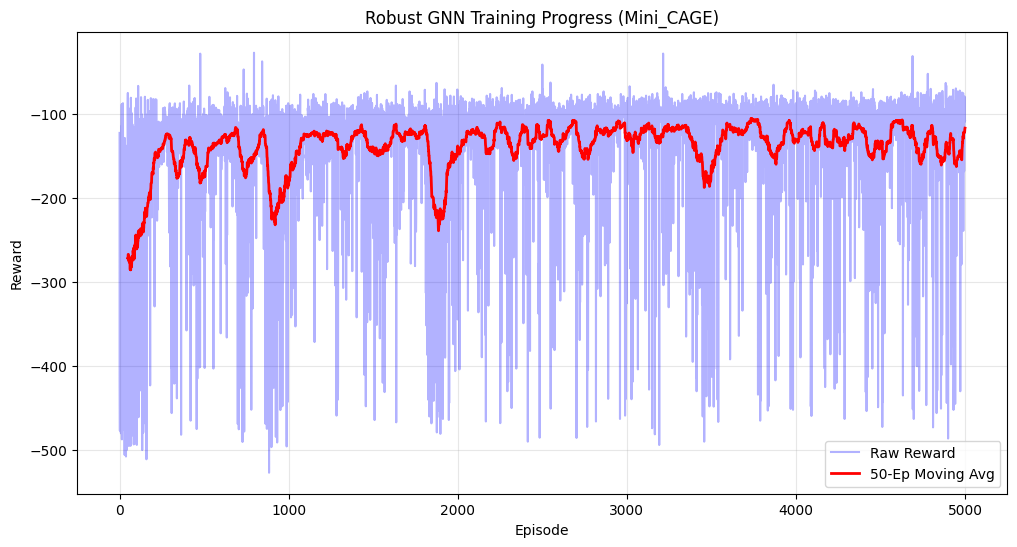


🔍 STARTING EVALUATION (100 Episodes)...
✅ Evaluation Complete
   Average Reward: -104.62 ± 27.64
   Min Reward: -139.80
   Max Reward: -77.80
💾 Models saved to 'robust_gnn_actor.pth' and 'robust_gnn_critic.pth'
✅ Evaluation Complete
   Average Reward: -104.62 ± 27.64
   Min Reward: -139.80
   Max Reward: -77.80
💾 Models saved to 'robust_gnn_actor.pth' and 'robust_gnn_critic.pth'


In [24]:
# ============================================================================
# 📊 EVALUATION & VISUALIZATION
# ============================================================================
import matplotlib.pyplot as plt
import numpy as np

# 1. Plot Training Curve
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards_gnn, alpha=0.3, color='blue', label='Raw Reward')
# Moving average
window = 50
if len(episode_rewards_gnn) >= window:
    moving_avg = np.convolve(episode_rewards_gnn, np.ones(window)/window, mode='valid')
    plt.plot(range(window-1, len(episode_rewards_gnn)), moving_avg, color='red', linewidth=2, label=f'{window}-Ep Moving Avg')
plt.title("Robust GNN Training Progress (Mini_CAGE)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Evaluation Loop (Deterministic)
print("\n🔍 STARTING EVALUATION (100 Episodes)...")
eval_rewards = []
actor_gnn.eval() # Set to eval mode

for i in range(100):
    obs, info = env.reset()
    ep_reward = 0
    done = False
    
    action_mask = info.get('action_mask', None)
    
    while not done:
        obs_t = torch.FloatTensor(obs).unsqueeze(0).to(device)
        with torch.no_grad():
            logits = actor_gnn(obs_t, A_static)
            
            # Apply Mask
            if action_mask is not None:
                mask_t = torch.tensor(action_mask, device=device)
                logits = logits.masked_fill(mask_t == 0, -1e9)
                
            action = torch.argmax(logits, dim=1).item() # Deterministic action
            
        obs, reward, done, truncated, info = env.step(action)
        done = done or truncated
        ep_reward += reward
        action_mask = info.get('action_mask', None)
        
    eval_rewards.append(ep_reward)

avg_eval_reward = np.mean(eval_rewards)
std_eval_reward = np.std(eval_rewards)
print(f"✅ Evaluation Complete")
print(f"   Average Reward: {avg_eval_reward:.2f} ± {std_eval_reward:.2f}")
print(f"   Min Reward: {np.min(eval_rewards):.2f}")
print(f"   Max Reward: {np.max(eval_rewards):.2f}")

# 3. Save Models
torch.save(actor_gnn.state_dict(), "robust_gnn_actor.pth")
torch.save(critic_gnn.state_dict(), "robust_gnn_critic.pth")
print("💾 Models saved to 'robust_gnn_actor.pth' and 'robust_gnn_critic.pth'")
